In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [3]:
heart=pd.read_csv("processed.cleveland.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
heart.shape

(303, 14)

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
heart[[i for i in heart.columns if heart[i].isnull().sum()>0]].isnull().sum()

ca      4
thal    2
dtype: int64

In [8]:
heart.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [9]:
heart.ca = heart.ca.fillna(0.0)
heart.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [10]:
heart.thal.value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [11]:
heart.thal = heart.thal.fillna(3)
heart.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [125]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [12]:
print(heart.cp.unique())
print(heart.thal.unique())
print(heart.num.unique())

[1 4 3 2]
[6. 3. 7.]
[0 2 1 3 4]


In [13]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


<AxesSubplot:>

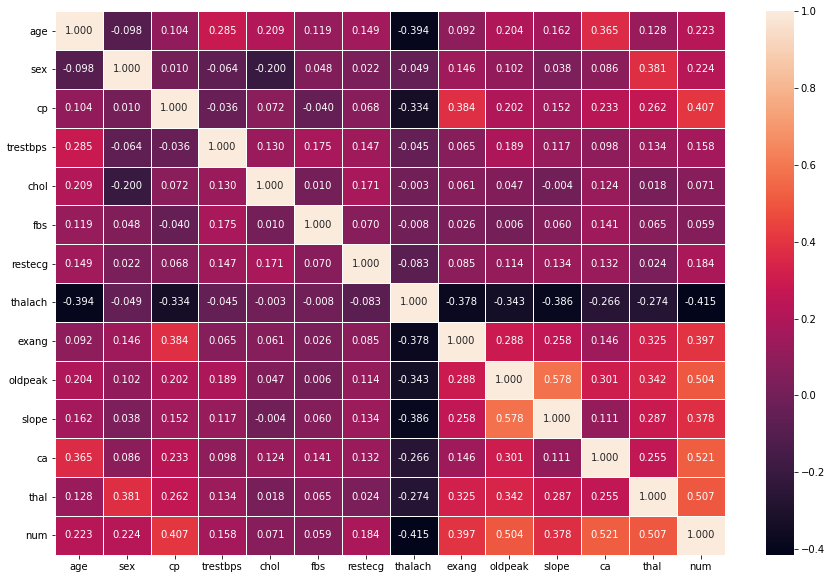

In [14]:
cor_mat=heart.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [15]:
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2


In [16]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [17]:
heart_scaled = heart

In [18]:
X = heart_scaled.drop('num', axis=1)
Y = heart_scaled.num

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2 ,random_state=1)

In [20]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

thal        0.154531
ca          0.148793
oldpeak     0.135505
cp          0.128294
fbs         0.089178
exang       0.086850
thalach     0.057735
slope       0.030023
restecg     0.029304
age         0.009784
sex         0.000000
trestbps    0.000000
chol        0.000000
dtype: float64

In [21]:
Req_Columns = list(mutual_info[mutual_info>0].index)
Req_Columns

['thal',
 'ca',
 'oldpeak',
 'cp',
 'fbs',
 'exang',
 'thalach',
 'slope',
 'restecg',
 'age']

In [22]:
X_train_final = X_train[Req_Columns]
X_train_final.head(1)

,thal,ca,oldpeak,cp,fbs,exang,thalach,slope,restecg,age
62,7.0,3.0,2.2,4,0,1,131,2,2,58


In [23]:
X_test_final = X_test[Req_Columns]
X_test_final.head(1)

,thal,ca,oldpeak,cp,fbs,exang,thalach,slope,restecg,age
204,7.0,0.0,0.0,4,0,0,161,1,0,43


In [126]:
np.random.seed(42)
LR_model=LogisticRegression()
LR_model.fit(X_train_final,y_train)
LR_model_y_pred=LR_model.predict(X_test_final)
LR_model_r2_score=round(r2_score(y_test,LR_model_y_pred)*100,2)
print("Accuracy on Training set: ",round(LR_model.score(X_train_final,y_train)*100,2))
LR_model_score = round(LR_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",LR_model_score)

Accuracy on Training set:  62.4
Accuracy on Testing set:  65.57


In [121]:
from collections import OrderedDict
new_data = OrderedDict([
    ('thal', 6),
    ('ca', 0),
    ('oldpeak', 2.3),
    ('cp', 1),
    ('fbs', 1),
    ('exang', 0),
    ('thalach', 150),
    ('slope', 3),
    ('restecg', 2),
    ('age', 63)])
print(new_data)

OrderedDict([('thal', 6), ('ca', 0), ('oldpeak', 2.3), ('cp', 1), ('fbs', 1), ('exang', 0), ('thalach', 150), ('slope', 3), ('restecg', 2), ('age', 63)])


In [122]:
new_data = pd.Series(new_data).values.reshape(1,-1)
print(new_data)

[[  6.    0.    2.3   1.    1.    0.  150.    3.    2.   63. ]]


In [123]:
LR_model.predict(new_data)

array([0], dtype=int64)

In [124]:
import joblib
joblib.dump(LR_model, 'model.joblib')

['model.joblib']